# STA Homework 1

**Bob Ding**

**zd26**

In [61]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import seaborn as sns
import math
import os
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Problem 1

Done

# Problem 2

Done, but this time I'd prefer to use python

# Problem 3

In [62]:
# Calculate v based on s and phi
def Calv(phi, s):
    v = s * (1 - phi **2)
    return v

# Simulate function
def Simulate(n: int, x_0, v, phi):
    data = [(1, x_0)]
    x_prev = x_0
    for i in range(n):
        x_update = np.random.normal(phi*x_prev, math.sqrt(v))
        x_prev = x_update
        data.append( [i+2, x_update] )
    return np.array(data)

C:\Users\zd26\Anaconda3\lib\site-packages\statsmodels\graphics\utils.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
C:\Users\zd26\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


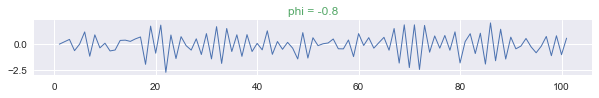

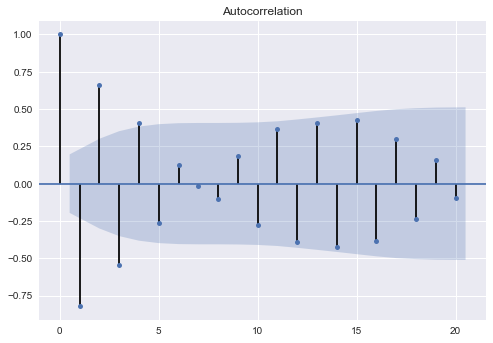

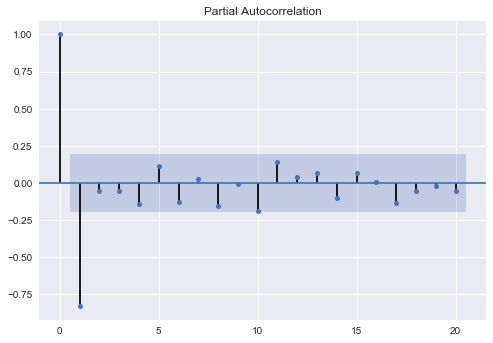

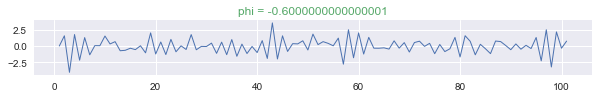

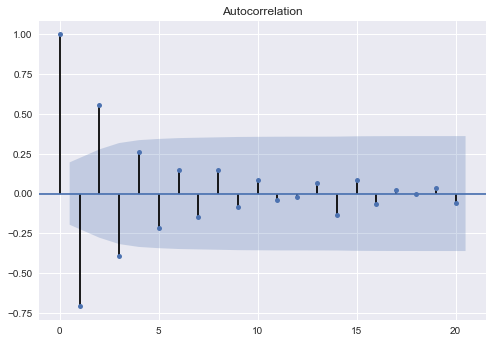

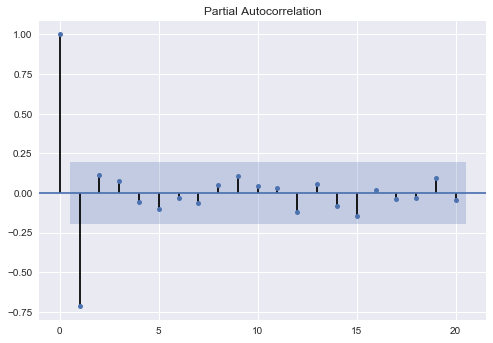

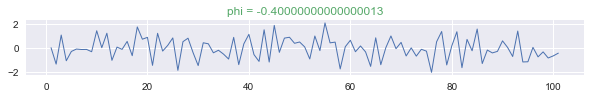

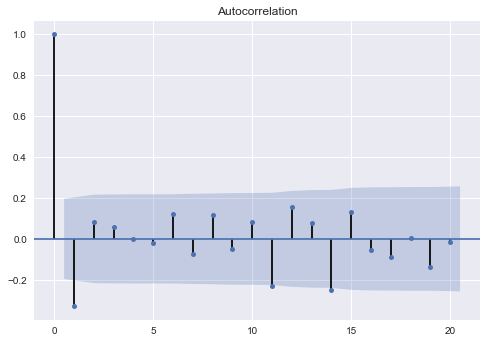

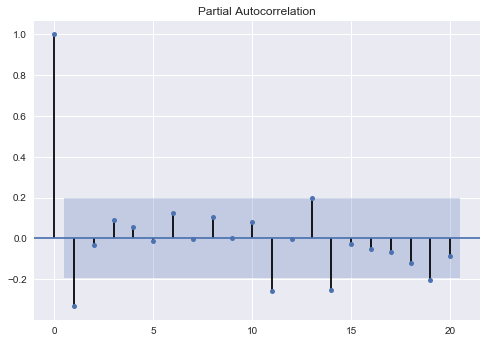

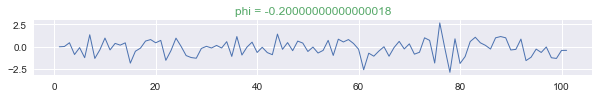

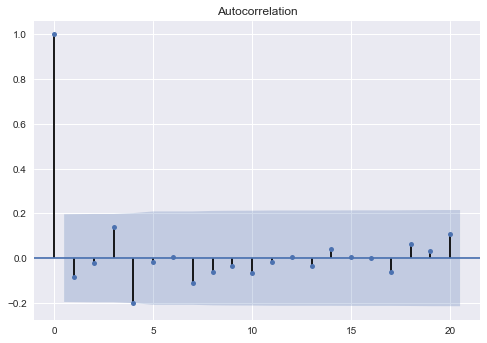

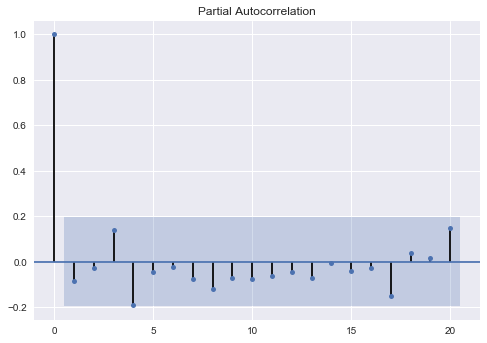

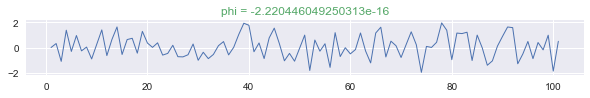

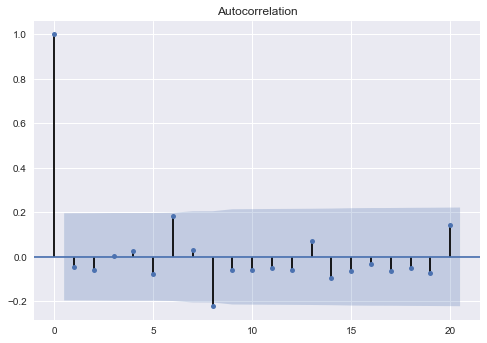

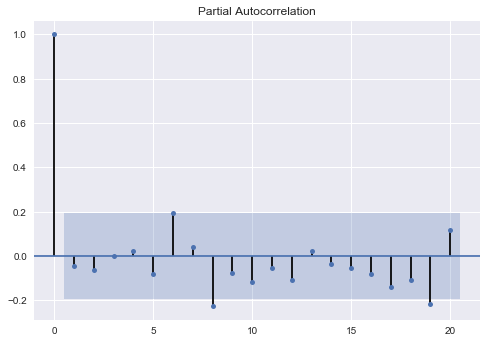

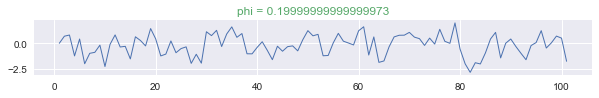

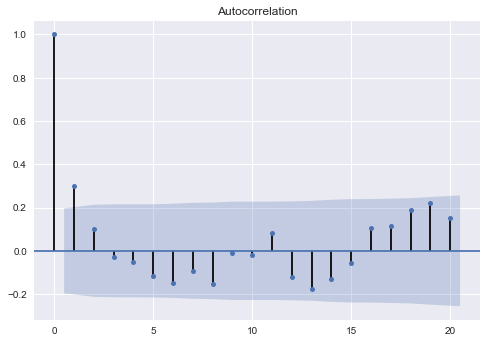

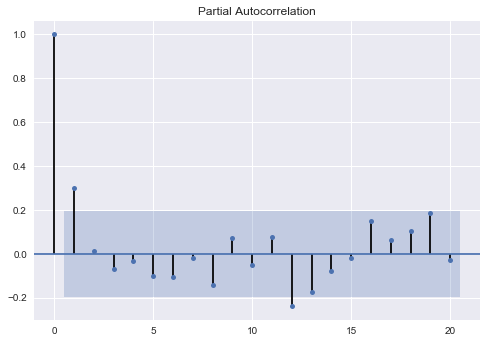

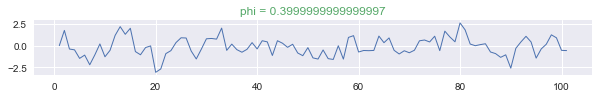

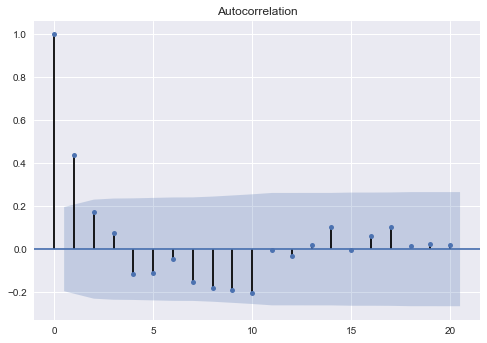

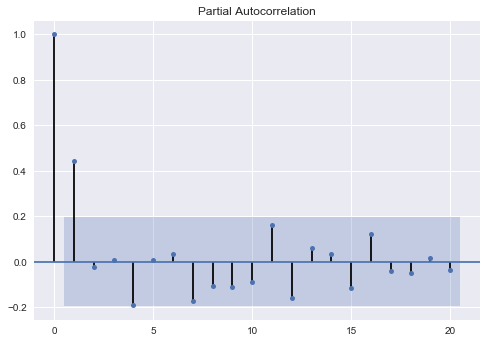

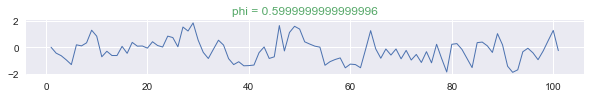

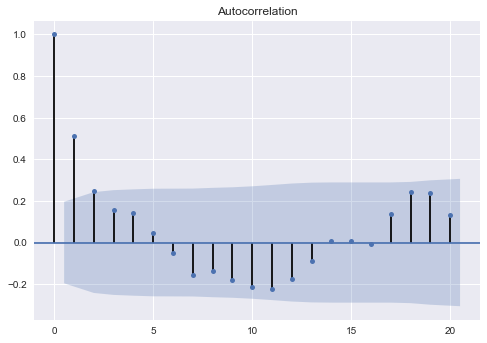

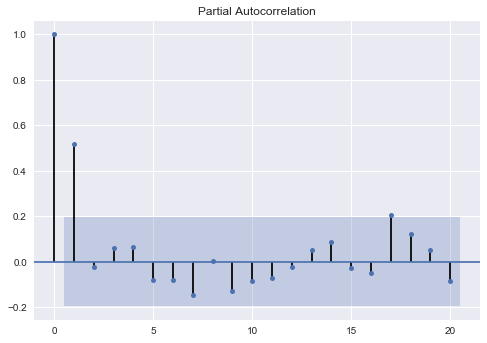

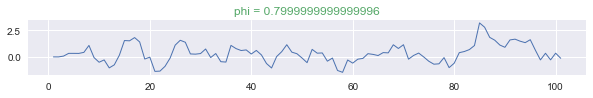

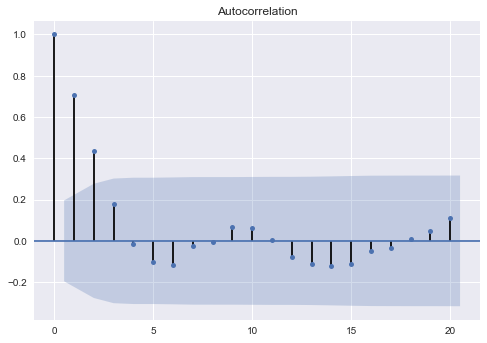

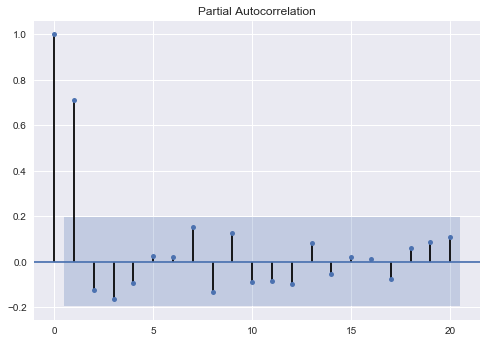

In [63]:
n = 100
x_0 = 0
s = 1
phis = np.arange(-1, 1, 0.2)
vs = [Calv(phi, s) for phi in phis]
mpl.style.use("seaborn")

for i, phi in enumerate(phis):
    if i != 0:
        data = Simulate(n, x_0, vs[i], phi)
        fig, ax = plt.subplots(figsize=(10, 1))
        title = "phi = "+str(phi)
        ax.set_title(title.format("seaborn"), color='C1')
        ax.plot(data[:, 0], data[:, 1], linewidth=1)
        plot_acf(data[1:, 1], lags = 20 )
        plot_pacf(data[1:, 1], lags = 20)

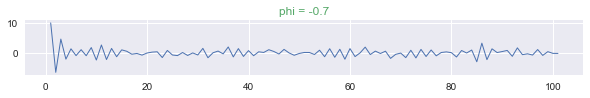

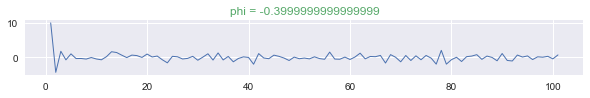

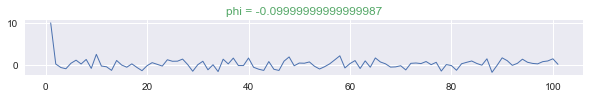

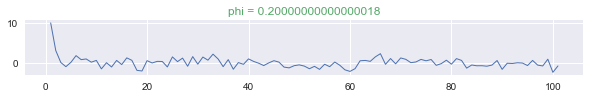

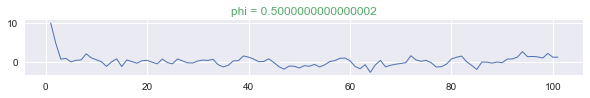

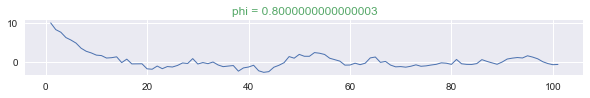

In [64]:
n = 100
x_0 = 10
s = 1
phis = np.arange(-1, 1, 0.3)
vs = [Calv(phi, s) for phi in phis]
mpl.style.use("seaborn")


for i, phi in enumerate(phis):
    if i != 0:
        data = Simulate(n, x_0, vs[i], phi)
        fig, ax = plt.subplots(figsize=(10, 1))
        title = "phi = "+str(phi)
        ax.set_title(title.format("seaborn"), color='C1')
        ax.plot(data[:, 0], data[:, 1], linewidth=1)

* interpretation

We've conducted simulation using s=1, $\phi = -.7, -.4, -.1, .2, .5, .8$ for both $x_0 = 0$ anf $x_0 = 10$. We recognize that when $|\phi|\leq 1$ the process converges around 0. Therefore, as we have once set $x_0 = 10$, we have the process quickly vanishes around 0. As for $\phi$, we find that when $\phi < 0$ the process is highly self-reflective, and the other way otherwise. Given that $|\phi| \leq 1$, we observes that the process have the higher pacf value for lag 1 when absolute value of $\phi$ goes up, and smaller pacf value for smaller absolute value.

# Problem 4

In [71]:
spdata = pd.read_excel("USMacroData1965_2016updated.xlsx")
spdata.head()

,Date,Inflation,Wage,Unemployment,Consumption,Investment,InterestRate,M1 Money Supply,M2 Money Supply,S&P500
0,1965-01-01,1.557632,3.200000,4.9,6.972061,12.3,3.90,4.686510,8.210263,11.962038
1,1965-02-01,1.557632,3.600000,5.1,7.811330,13.2,3.98,4.158545,8.174044,11.642220
2,1965-03-01,1.242236,4.000000,4.7,7.828032,18.7,4.04,4.441541,8.347957,10.516132
3,1965-04-01,1.552795,3.585657,4.8,8.477938,9.8,4.09,4.768041,8.399602,9.152161
4,1965-05-01,1.552795,3.968254,4.6,7.139364,10.2,4.10,3.929273,8.073760,9.791089


There are 453 sub-sequences created


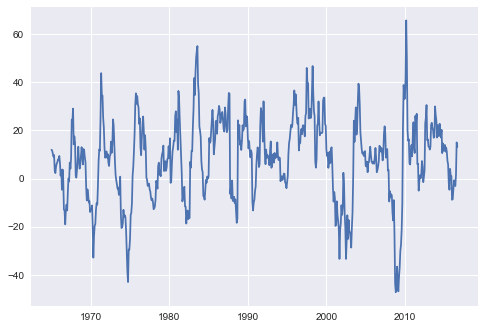

In [66]:
# Show the data
priceData = spdata[ ["Date", "S&P500"]].values
plt.plot(priceData[:, 0], priceData[:, 1])

# Make months data
k = 169 # Length of a window
series = []
total_length = priceData.shape[0]
i = 0
while i+ k - 1 != total_length:
    window_data = priceData[i:i+k, :] 
    series.append(window_data)
    i += 1
print("There are {} sub-sequences created".format(len(series)))

Long term mean of phi is 0.9187201090282399, 90% confidence interval is (0.6597988450893678, 1.1776413729671118)


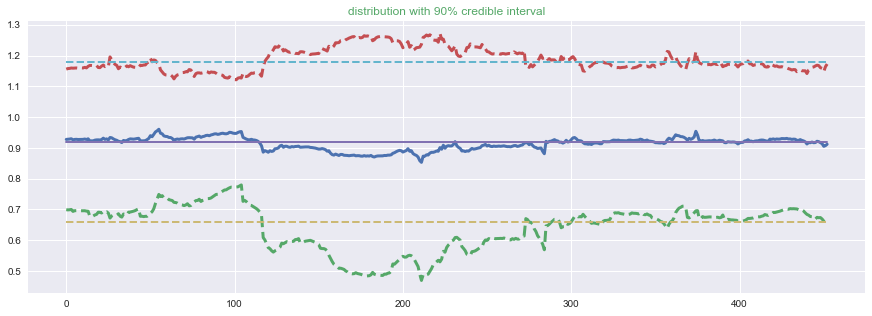

In [67]:
import scipy.stats

def GetPosInfo(data):
    meanDnom = np.sum(  np.multiply(data[:-1], data[:-1])    )
    meanNom = np.sum(  np.multiply(data[:-1], data[1:])    )
    mean = meanNom / meanDnom
    
    scaleDnom = meanDnom ** 2
    scaleNom = np.sum(np.multiply(data[1:], data[1:]))   * meanDnom - meanNom ** 2
    scale = scaleNom / scaleDnom
    return mean, scale


# Fit AR(1) modes

distList = []

for p in series:
    prices = p[:, 1].reshape([-1])
    mean = np.mean(prices)
    prices -= mean
    
    # Calculate mean
    mean, scale= GetPosInfo(prices)
    df = k - 2
    dis = scipy.stats.t(df = df, loc =mean, scale = scale)
    distList.append(dis)
    
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_title("distribution with 90% credible interval", color='C1')
ax.plot([i for i in range(len(series))], [dis.mean() for dis in distList], linewidth=3)
ax.plot([i for i in range(len(series))], [dis.interval(0.90) for dis in distList], linewidth=3, linestyle = "--")


# Calculate Long term dependencies
prices = priceData[:, 1].reshape([-1])
mean = np.mean(prices)
prices -= mean
    
# Calculate mean
mean, scale= GetPosInfo(prices)
df = k - 2
disLong = scipy.stats.t(df = df, loc =mean, scale = scale)
print("Long term mean of phi is {}, 90% confidence interval is {}".format(disLong.mean(), disLong.interval(0.9)))

ax.plot([i for i in range(len(series))], [disLong.mean() for i in range(len(series))], linewidth=2)
ax.plot([i for i in range(len(series))], [disLong.interval(0.90) for i in range(len(series))], linewidth=2, linestyle = "--")

We take the window length to be 164 (equiv. K=84).

* (a) The $\phi$ value for each windows seems to be pretty stationary. However, the variance for $\phi$ varies a lot at different windows.

* (b) Yes. Because we se that both the confidence interval and the mean of long term and short term changes agree. Even there are small deviation, but I believe that if we conduct a neyman-pearson test, this deviation won't show significant evidences of rejecting the null hypothesis that short term changes are reflective of real long-term changes.

* (c) As for stability, we see that the confidence interval and mean of the distribution mostly aligns. To test stability, we can treat the process of mean as a random walk, thereby forming a null-hypothesis. Then, by conducting sequential LR test along the process, we can see if the process is stable process or not.

* (d) The innovation depends on its mean 0 and the variance, and the posterior distribution of the variance is supposed to be $Inverse-\chi^2(n-2, s^2)$, with $s^2=\frac{R}{n-2}$ and $R = \sum_{t=2}^n y_t^2 - \frac{(\sum_{t=2}^n y_t y_{t-1})^2}{\sum_{t=1}^{n-1}y_t^2}$. We could obtain the posterior credible intervals for $v$ in different subseries, and compare graphically as for $\phi$.   

* (e) We could possibly integrate moving average into the model as the price process doesn't necessarily have to be stationary


# Problem 5

* (a)
\begin{aligned}
    &\left(\phi | v, \mathcal{D}_{t-1}\right) \sim N\left(m_{t-1}, C_{t-1}\left(v / s_{t-1}\right)\right)\\
    &\left(v^{-1} | \mathcal{D}_{t-1}\right) \sim \operatorname{Ga}\left(n_{t-1} / 2, n_{t-1} s_{t-1} / 2\right)
\end{aligned}
    We know by theorem that NG integration will end up with a t distribution. Therefore:

$$
        p(\phi | \mathcal{D}_{t-1}) \sim t_{n_{t-1}}(m_{t-1}, C_{t-1})
$$

* (b)

\begin{aligned}
        p(x_t | v, \mathcal{D}_{t-1}) &= \int_\mathbb{R} p(x_t | \phi) p(\phi | v, \mathcal{D}_{t-1}) d\phi\\
        &= \int_\mathbb{R} N(\phi x_{t-1} , v) N\left(m_{t-1}, C_{t-1}\left(v / s_{t-1}\right)\right) d\phi\\
        &= \int_\mathbb{R} \frac{1}{\sqrt{2\pi v}} \exp\{ \frac{(x_t-\phi x_{t-1})^2}{v}\} \frac{1}{\sqrt{2\pi \frac{C_{t-1}v}{s_{t-1}}}} \exp\{ \frac{(\phi - m_{t-1})^2}{\frac{C_{t-1}v}{s_{t-1}}} \} d\phi\\
        &= \frac{1}{2\pi v \sqrt{\frac{C_{t-1}}{s_{t-1}}}}\int_{\mathbb{R}} \exp\{\frac{  \phi^2(x_{t-1}^2 + \frac{s_{t-1}}{C_{t-1}})  - 2\phi(x_tx_{t-1} + m_{t-1}\frac{s_{t-1}}{C_{t-1}} ) + (x_t^2 + m_{t-1}^2\frac{s_{t_1}}{c_{t-1}})   }{v}\}  d\phi\\
        &= \frac{1}{2\pi v \sqrt{\frac{C_{t-1}}{s_{t-1}}}} \exp\{\frac{x_t^2 + m_{t-1}^2\frac{s_{t_1}}{c_{t-1}}   }{v}\}\int_{\mathbb{R}} \exp\{\frac{  \phi^2(x_{t-1}^2 + \frac{s_{t-1}}{C_{t-1}})  - 2\phi(x_tx_{t-1} + m_{t-1}\frac{s_{t-1}}{C_{t-1}} )}{v}\}  d\phi\\
\end{aligned}
    
By doing some algebra, time and divide the same scalar to make the integral another gaussian, we end up with

\begin{aligned}
    p(x_t | v, \mathcal{D}_{t-1}) &\sim N(m_{t-1}x_{t-1}, \frac{v(s_{t-1} + C_{t-1}x_{t-1}^2)}{s_{t-1}})
\end{aligned}

* (c)
Similar as part 1, by thm we know this will integrate to a t distribution

\begin{aligned}
        p(x_t | \mathcal{D}_{t-1}) &\sim t_{n_{t-1}}(m_{t-1}x_{t-1}, s_{t-1} + C_{t-1}x_{t-1}^2)
\end{aligned}
    
* (d)

\begin{aligned}
        p(\phi, v | \mathcal{D}_t) &\propto p(x_t | \mathcal{D}_{t-1}, \phi, v)p(\phi | \mathcal{D}_{t-1}, v)p(v | \mathcal{D}_{t-1})\\
        &\propto N(\phi x_{t-1}, v)N(m_{t-1}, C_{t-1}(v / s_{t-1}) \operatorname{Ga}(n_{t-1} / 2, n_{t-1} s_{t-1} / 2)\\
        &\propto \frac{1}{\sqrt{v}}\exp\{\frac{(x_t - \phi x_{t-1})^2}{v}\}  \frac{1}{\sqrt{2\pi \frac{C_{t-1}v}{s_{t-1}}}}\\
        &\exp\{ \frac{(\phi - m_{t-1})^2}{\frac{C_{t-1}v}{s_{t-1}}} \} \frac{(\frac{n_{t-1}s_{t-1}}{2})^{\frac{n_{t-1}}{2}}}{\Gamma(\frac{v_{t-1}}{2})}(v^{-1})^{\frac{n_{t-1}}{2}-1}\exp\{-v^{-1}\frac{n_{t-1}s_{t-1}}{2}\}\\
        &\propto \frac{1}{v}\exp\{\frac{(x_t - \phi x_{t-1})^2}{v}\} \exp\{ \frac{(\phi - m_{t-1})^2}{\frac{C_{t-1}v}{s_{t-1}}} \} (v^{-1})^{\frac{n_{t-1}}{2}-1}\exp\{-v^{-1}\frac{n_{t-1}s_{t-1}}{2}\}\\
        &\propto \exp\{\frac{(\phi - (m_{t-1}+ \frac{C_{t-1}x_{t-1}}{q_t}(x_t - m_{t-1}x_{t-1})))^2}{(C_{t-1}-(\frac{C_{t-1}x_{t-1}}{q_t})^2(s_{t-1}+C_{t-1}x^2_{t-1}))\left(n_{t-1}+e_{t}^{2} / q_{t}\right) / n_{t}}\}\\
        &(v^{-1})^{\frac{n_{t-1}-1}{2}}\exp\{-(v^{-1})s_{t-1}\left(n_{t-1}+e_{t}^{2} / q_{t}\right) / n_{t}\}\\
        &= N(m_{t-1}+ \frac{C_{t-1}x_{t-1}}{q_t}(x_t - m_{t-1}x_{t-1})), C_{t-1}-(\frac{C_{t-1}x_{t-1}}{q_t})^2(s_{t-1}+C_{t-1}x^2_{t-1})\\
        &\left(n_{t-1}+e_{t}^{2} / q_{t}\right) / n_{t}) \mathrm{Ga}(n_{t-1}+1, s_{t-1}\left(n_{t-1}+e_{t}^{2} / q_{t}\right) / n_{t})\\
        &= \mathrm{N}(m_t, C_t)\mathrm{Ga}(n_t, s_t)
\end{aligned}
    
* (e)
    + [i] $x_t$ affect the $\phi$ mean $m_t$ by inducing prediction error. Such error can scale by the adaptive coefficient then induce a deviation of the mean on posterior of $\phi$. Therefore, $m_t = m_{t-1} + A_te_t$. $C_t$ doesn't directly depend on $x_t$.
    
    + [ii] The adapt coefficient is to scale the deviation of $x_t$ to its prediction's mean back to the deviation of mean on $\phi$'s prior. Therefore deviating the posterior mean and the decrease variance.
    
    + [iii] degrees of freedom just increase by 1 as there is $x_t$ one more data point being observed. $s_t$ depend on $x_t$ as the more $x_t$ deviate from its posterior mean, the more $s_t$ will be deviated, leaving the shape of distribution for $v$ to widen, causing more uncertainty.
    


* (f)
Then mean will shift a lot from $m_{t-1}$, variance will also be much bigger for $\phi$. The degrees of freedom still increase by one, but the shape will have much bigger value, causing uncertainty of posterior distribution for $v$.


